# How restaurant starts in Yelp relate to location in US

#                                                                  - by Shirun Li (1003925577) 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
df = pd.read_json("C:/Users/93573/ECO225/project dataset/yelp_academic_dataset_business.json", lines=True)
dataframe=pd.DataFrame(df)

In [3]:
dataframe.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209393 non-null  object 
 2   address       209393 non-null  object 
 3   city          209393 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   209393 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


In [5]:
dataframe.describe()

,latitude,longitude,stars,review_count,is_open
count,209393.000000,209393.000000,209393.000000,209393.000000,209393.000000
mean,38.579934,-97.390217,3.538055,36.937505,0.806632
std,4.940448,16.718535,1.023543,123.343597,0.394940
min,21.497258,-158.025525,1.000000,3.000000,0.000000
25%,33.638658,-112.269476,3.000000,4.000000,1.000000
50%,36.147408,-111.743531,3.500000,9.000000,1.000000
75%,43.611693,-79.972679,4.500000,27.000000,1.000000
max,51.299943,-72.806550,5.000000,10129.000000,1.000000


Methodology:
As our task is to discover the relationship between review starts and location, starts is selected as the standard to evaluate the restaurant's quality. In addition, state and city are selected to stand for the location.

In [6]:
dataframe[["city","state"]].describe()

,city,state
count,209393,209393
unique,1251,37
top,Las Vegas,AZ
freq,31631,60803


In [7]:
dataframe[["stars"]].describe()

,stars
count,209393.000000
mean,3.538055
std,1.023543
min,1.000000
25%,3.000000
50%,3.500000
75%,4.500000
max,5.000000


In [8]:
dataframe[["stars"]].sum()

stars    740844.0
dtype: float64

Text(0.5, 1.05, 'distribution for dependent variable starts')

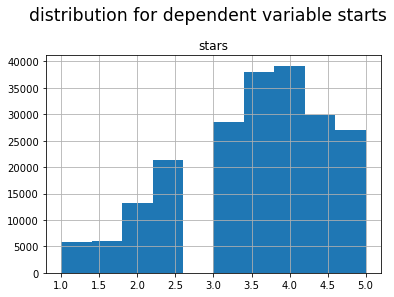

In [9]:
#plot for the independent variables and dependent vairbale
hist = dataframe[["stars"]].hist(bins=10)
plt.suptitle('distribution for dependent variable starts', x=0.5, y=1.05, ha='center', fontsize='xx-large')

Text(0, 0.5, 'frequency')

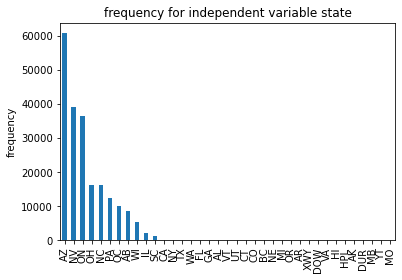

In [10]:
dataframe['state'].value_counts().plot(kind='bar',title="frequency for independent variable state")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

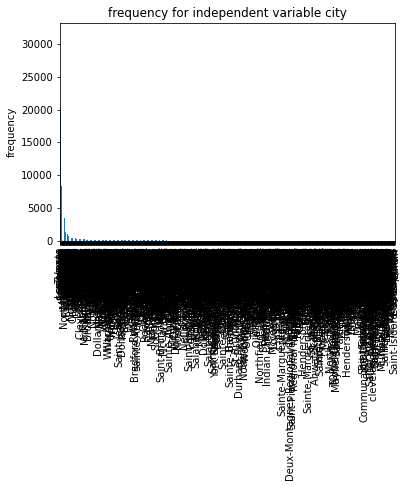

In [11]:
dataframe['city'].value_counts().plot(kind='bar',title="frequency for independent variable city")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

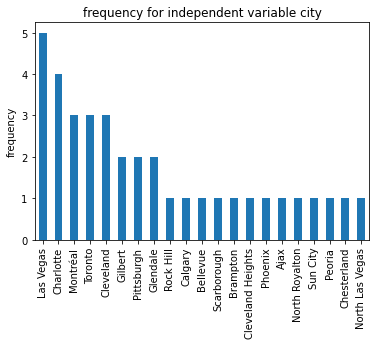

In [12]:
#because it is invisible for the distribution of x, then I randomly pick 37 cities in a new dataframe to show their frequency
city2=dataframe[['city','stars']].sample(n=37)
dataframe2=pd.DataFrame(city2)
dataframe2['city'].value_counts().plot(kind='bar',title="frequency for independent variable city")
plt.ylabel("frequency")

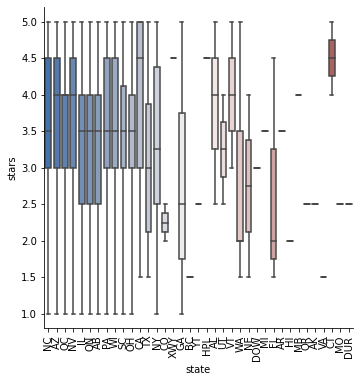

In [13]:
sns.catplot(x="state", y="stars", kind="box", data=dataframe, whis=[0, 100], width=0.7, palette="vlag").set_xticklabels(rotation=90)

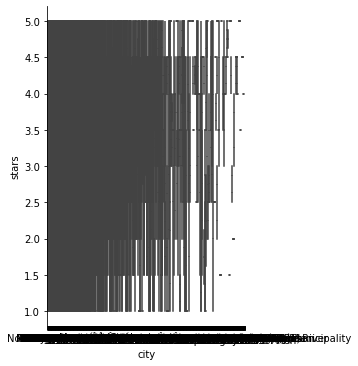

In [14]:
sns.catplot(x="city", y="stars", kind="box", data=dataframe, whis=[0, 100], width=.6, palette="vlag")

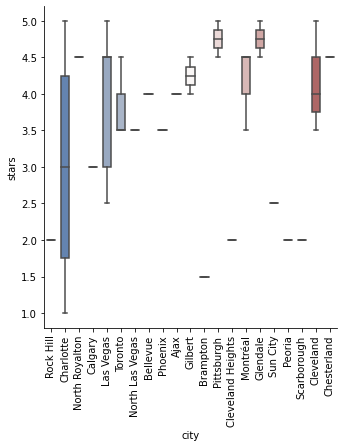

In [15]:
#because it is invisible about the relationship between city and starts, so I will continue to use datframe2
sns.catplot(x="city", y="stars", kind="box", data=dataframe2, whis=[0, 100], width=.6, palette="vlag").set_xticklabels(rotation=90)

In [16]:
dataframe.groupby(["state", "city"])["stars"].mean()

state  city     
AB                  1.000000
       Airdrie      3.137097
       Alberta      2.500000
       Balzac       2.954545
       Beltline     5.000000
                      ...   
WI     Waunakee     3.518519
       Windsor      3.450000
       stoughton    3.500000
XWY    Leeds        4.500000
YT     Toronto      2.500000
Name: stars, Length: 1306, dtype: float64

In [17]:
d=dataframe.groupby(["state", "city"])["stars"]
d.describe()

count      mean       std  min  25%  50%    75%  max
state city                                                           
AB                 1.0  1.000000       NaN  1.0  1.0  1.0  1.000  1.0
      Airdrie    186.0  3.137097  1.041709  1.0  2.5  3.5  4.000  5.0
      Alberta      1.0  2.500000       NaN  2.5  2.5  2.5  2.500  2.5
      Balzac      11.0  2.954545  1.254084  1.0  2.0  3.0  3.750  5.0
      Beltline     1.0  5.000000       NaN  5.0  5.0  5.0  5.000  5.0
...                ...       ...       ...  ...  ...  ...    ...  ...
WI    Waunakee   108.0  3.518519  1.004490  1.0  2.5  3.5  4.125  5.0
      Windsor     20.0  3.450000  0.985420  2.0  2.5  3.5  4.000  5.0
      stoughton    1.0  3.500000       NaN  3.5  3.5  3.5  3.500  3.5
XWY   Leeds        1.0  4.500000       NaN  4.5  4.5  4.5  4.500  4.5
YT    Toronto      1.0  2.500000       NaN  2.5  2.5  2.5  2.500  2.5

[1306 rows x 8 columns]

In [19]:
sns.catplot(x="state", y="stars", kind="box", data=d, whis=[0, 100], width=0.7, palette="vlag").set_xticklabels(rotation=90)

AttributeError: 'SeriesGroupBy' object has no attribute 'get'

In [18]:
#type my colde below
#hahaah